In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from ast import literal_eval
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

import eta_tools

/Users/amikano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Handmade package 'eta_tools' successfully imported.


In [2]:
cwd = os.getcwd()

CORPUS = pd.read_csv(cwd+"/output/CORPUS.csv")
LIB = pd.read_csv(cwd+"/output/LIB.csv")
VOCAB = pd.read_csv(cwd+"/output/VOCAB.csv")

In [3]:
CORPUS

review_id  sent_id  token_id  \
0       Twelfth Night is a New Perspective at the Nati...        0         0   
1       Twelfth Night is a New Perspective at the Nati...        0         1   
2       Twelfth Night is a New Perspective at the Nati...        0         2   
3       Twelfth Night is a New Perspective at the Nati...        0         3   
4       Twelfth Night is a New Perspective at the Nati...        0         4   
...                                                   ...      ...       ...   
280938              ART's Julius Caesar Swings and Misses       38        21   
280939              ART's Julius Caesar Swings and Misses       38        22   
280940              ART's Julius Caesar Swings and Misses       38        23   
280941              ART's Julius Caesar Swings and Misses       38        24   
280942              ART's Julius Caesar Swings and Misses       38        25   

             term_str                pos_tuple  pos  
0              golden         ('golden', 'JJ')   JJ  
1               brown          ('brown', 'NN')   NN  
2              leaves        ('leaves', 'VBZ')  VBZ  
3            decorate      ('decorate', 'VBP')  VBP  
4                 the            ('the', 'DT')   DT  
...               ...                      ...  ...  
280938            not            ('not', 'RB')   RB  
280939             at             ('at', 'IN')   IN  
280940              a              ('a', 'DT')   DT  
280941  disassociated  ('disassociated', 'JJ')   JJ  
280942       distance       ('distance', 'NN')   NN  

[280943 rows x 6 columns]

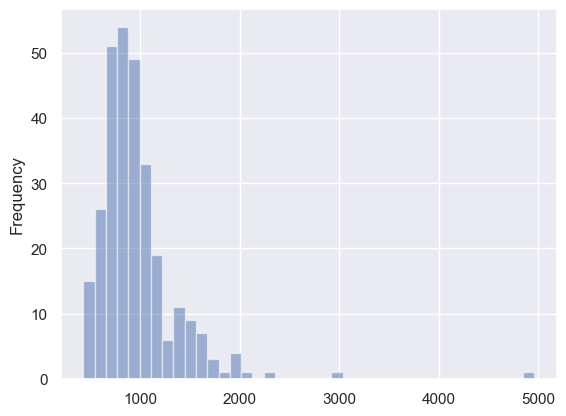

In [4]:
fig, ax = plt.subplots()
CORPUS.review_id.value_counts().plot.hist(bins=40, alpha=0.5);
fig.savefig(cwd+'/output/images/corpus_length_histogram.png')

In [5]:
LIB

Original Work                                       Review Title  \
0    Twelfth Night  Twelfth Night is a New Perspective at the Nati...   
1    Twelfth Night   Twelfth Night Offers Clarity with Complications    
2    Twelfth Night  Twelfth Night Goes for Synthesis through Antit...   
3    Twelfth Night  Shakespeare Set in the Summer of Love: "There'...   
4    Twelfth Night                  Big Things Come in Small Packages   
..             ...                                                ...   
287  Julius Caesar  Boredom from Julius Caesar? NYC Buries Pigeon ...   
288  Julius Caesar                  Stars Rise as Mighty Caesar Falls   
289  Julius Caesar                                 An American Caesar   
290  Julius Caesar      Julius Caesar Takes a Stab at the Shakespeare   
291  Julius Caesar              ART's Julius Caesar Swings and Misses   

            Review Author                                            Content  \
0       Christopher Adams  golden brown leaves decorate the edges of the ...   
1    Claudine Nightingale  ive been eagerly awaiting the arrival of grego...   
2         Denise Battista  hear ye hear ye! shakespeare at stinson beach ...   
3         Denise Battista  i was born in the 70s but that doesnt mean i w...   
4       Carrie Cleaveland  city lit's production of twelfth night proves ...   
..                    ...                                                ...   
287        Roseanne Wells  pigeon creek shakespeare company which origina...   
288       Denise Battista  in shakespeares julius caesar the plot is simp...   
289      Michael Kostroff  if youve never seen a play at theatricum botan...   
290   Georgina Petronella  julius caesar is the first shakespeare play i ...   
291            Jess Pease  although it's sometimes hard to imagine in man...   

     Overall Rating    Genre Rating Category  
0                 3   Comedy        Negative  
1                 4   Comedy        Positive  
2                 4   Comedy        Positive  
3                 5   Comedy        Positive  
4                 4   Comedy        Positive  
..              ...      ...             ...  
287               1  Tragedy        Negative  
288               4  Tragedy        Positive  
289               4  Tragedy        Positive  
290               4  Tragedy        Positive  
291               2  Tragedy        Negative  

[292 rows x 7 columns]

In [6]:
LIB["Original Work"].value_counts().to_frame('Count')

Count
Midsummer Night's Dream       50
Hamlet                        40
Macbeth                       39
Twelfth Night                 37
Romeo & Juliet                36
As You Like It                26
All's Well That Ends Well     19
Julius Caesar                 19
Love's Labour's Lost          13
Othello                       13

In [7]:
LIB["Genre"].value_counts().to_frame('Count')

Count
Tragedy    147
Comedy     145

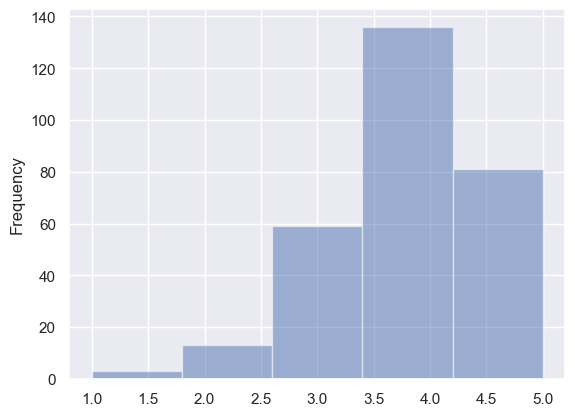

In [8]:
fig, ax = plt.subplots()

LIB["Overall Rating"].plot.hist(bins=5, alpha=0.5);

fig.savefig(cwd+'/output/images/rating_histogram_plain.png')

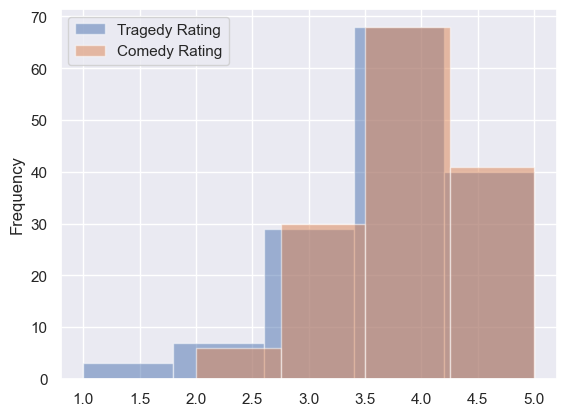

In [9]:
fig, ax = plt.subplots()
LIB[LIB.Genre=="Tragedy"]["Overall Rating"].to_frame("Tragedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=5, alpha=0.5, ax=ax)
LIB[LIB.Genre=="Comedy"]["Overall Rating"].to_frame("Comedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=4, alpha=0.5, ax=ax);

fig.savefig(cwd+'/output/images/rating_histogram.png')

In [10]:
VOCAB = VOCAB.set_index('term_str')

In [11]:
VOCAB.sort_values('n', ascending=False)

n  n_chars         p          i max_pos  n_pos  stop  \
term_str                                                                       
the                 19166        3  0.068220   3.873656      DT      1     1   
and                 10334        3  0.036783   4.764807      CC      1     1   
of                   8917        2  0.031740   4.977575      IN      1     1   
a                    7653        1  0.027240   5.198108      DT      1     1   
to                   6412        2  0.022823   5.453359      TO      1     1   
...                   ...      ...       ...        ...     ...    ...   ...   
intercession            1       12  0.000004  18.099918      NN      1     0   
interchangeability      1       18  0.000004  18.099918      NN      1     0   
intercourse             1       11  0.000004  18.099918      NN      1     0   
intercut                1        8  0.000004  18.099918      NN      1     0   
à                       1        1  0.000004  18.099918     NNP      1     0   

                   stem_porter stem_snowball stem_lancaster  
term_str                                                     
the                        the           the            the  
and                        and           and            and  
of                          of            of             of  
a                            a             a              a  
to                          to            to             to  
...                        ...           ...            ...  
intercession         intercess     intercess      intercess  
interchangeability  interchang    interchang     interchang  
intercourse         intercours    intercours     intercours  
intercut              intercut      intercut       intercut  
à                            à             à              à  

[23374 rows x 10 columns]

## Topic Modeling

In [12]:
noun_verb = ["NN", "NNS", 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']  

In [13]:
CORPUS = CORPUS[CORPUS.pos.isin(noun_verb)]
VOCAB = VOCAB[VOCAB.max_pos.isin(noun_verb)]

In [14]:
model = eta_tools.topic_model(CORPUS, 25)

In [15]:
model.topics.sort_values("term_freq", ascending=False).head(5)

term_str            0           1         2           3            4       5  \
topic_id                                                                       
T11            actors  production  director        play        night    love   
T06               way     playing      play        cast   production   actor   
T18            design         set  lighting  set design  performance   sound   
T24       productions  production      play     theater      theatre  actors   
T10           company       going      play  production         left     set   

term_str           6                                              label  \
topic_id                                                                  
T11         audience  T11 actors, production, director, play, night,...   
T06         audience  T06 way, playing, play, cast, production, acto...   
T18       production  T18 design, set, lighting, set design, perform...   
T24             love  T24 productions, production, play, theater, th...   
T10            stage  T10 company, going, play, production, left, se...   

term_str  doc_weight_sum  term_freq  
topic_id                             
T11           561.608939   0.046775  
T06           623.240290   0.045237  
T18           593.296031   0.044134  
T24           557.787052   0.043387  
T10           549.200656   0.042856

In [16]:
model.topics[list(LIB['Genre'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Genre')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [['Comedy', 'Tragedy', 'label']]\
        .style.background_gradient(cmap="YlGnBu", axis=None)

In [17]:
model.topics[list(LIB['Rating Category'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Rating Category')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [['Positive', 'Negative', 'label']].style.background_gradient(cmap="YlGnBu", axis=None)

In [18]:
model.topics[list(LIB['Original Work'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Original Work')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [list(LIB['Original Work'].unique())+['label']].style.background_gradient(cmap="YlGnBu", axis=None)

In [19]:
model.theta

T00       T01  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.010000  0.010000   
                                            3        0.008000  0.008000   
                                            4        0.006667  0.177099   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.840000   

                                                          T02       T03  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.010000  0.010000   
                                            3        0.008000  0.008000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.003077  0.003077   
                                            33       0.862857  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.006667   

                                                          T04       T05  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.010000  0.010000   
                                            3        0.008000  0.008000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.926154   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.006667   

                                                          T06       T07  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.010000  0.010000   
                                            3        0.008000  0.008000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.351767   
                                            35       0.006667  0.006667   

                                                          T08       T09  ...  \
review_id                                   sent_id                      .

In [20]:
model.phi

term_str     aaron  abandoned  abilities    ability  absurdity   academy  \
topic_id                                                                   
T00       0.181680   0.040000   0.040000   0.216671   0.371512  0.123837   
T01       0.040000   5.060954   2.040000   0.850938   1.040000  0.040000   
T02       1.040000   1.148056   1.040000   0.040000   0.040000  0.040000   
T03       0.040013   0.040000   0.040000   1.307937   0.040000  0.060092   
T04       0.249773   0.040000   1.040000   3.155094   0.574924  0.040000   
T05       0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T06       0.040000   1.040000   0.040000   0.040000   0.040000  0.040000   
T07       2.040000   0.463749   0.040000   0.040000   0.040000  0.040000   
T08       0.040000   0.040000   1.040000   0.040000   0.040000  0.040000   
T09       0.040000   0.040000   0.040000   5.040000   0.040000  1.998988   
T10       2.040000   0.040000   0.040000   1.040000   0.040000  0.040000   
T11       2.417369   0.040000   0.040000   0.040000   1.708488  2.040000   
T12       0.040000   0.040000   1.140713   2.735012   0.040000  0.040000   
T13       0.442518   2.029130   0.040000   4.376922   0.040000  2.977083   
T14       0.040000   0.040000   0.040000  16.887809   1.040000  1.040000   
T15       0.040000   0.040000   0.040000   3.607240   1.493229  0.040000   
T16       1.375611   0.040000   0.040000   0.040000   0.128287  0.040000   
T17       2.040000   0.040000   0.040000   1.222377   1.040000  0.040000   
T18       0.040000   0.319021   0.040000   0.040000   2.040000  0.040000   
T19       0.040000   0.040000   3.939287   0.040000   0.040000  0.040000   
T20       0.040000   0.040000   0.040000   0.040000   0.040000  1.040000   
T21       0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T22       0.040000   0.040000   0.040000   0.040000   3.307377  0.040000   
T23       2.923406   1.219091   0.040000   0.040000   0.040000  0.040000   
T24       9.689631   0.040000   0.040000   0.040000   2.696183  0.040000   

term_str    accent  accented  accents     accept  ...       year      years  \
topic_id                                          ...                         
T00       0.040000  0.040000  0.04000   0.040000  ...   0.064480   0.040000   
T01       1.040000  0.040000  0.04000   0.054629  ...   2.143731   0.040000   
T02       3.841113  0.040000  0.04000   0.040000  ...   5.108015   0.040000   
T03       1.219465  0.040000  0.04000   0.040000  ...   2.758493   0.040000   
T04       0.040000  0.040000  0.04000   0.040000  ...   0.040000  11.159274   
T05       1.441583  0.718343  0.04000   0.040000  ...   0.040000   0.754109   
T06       0.040636  0.040000  1.04000   0.040000  ...   6.749242  18.456186   
T07       0.040000  0.040000  0.04000   0.040000  ...  18.926212   3.872348   
T08       0.040000  0.040000  0.04000   1.815126  ...   0.040000   1.256814   
T09       5.156838  0.040000  0.04000   0.040000  ...   5.271524   0.052107   
T10       0.040000  0.040000  1.04000   0.040000  ...  21.114632   2.955862   
T11       0.040119  0.040000  0.04000   0.040000  ...   0.057225   5.705295   
T12       0.040000  0.040000  0.04000   0.040000  ...   0.040000   0.040000   
T13       2.202458  0.040000  0.04000   1.324305  ...   0.040000   3.189230   
T14       1.076429  0.040000  0.04000   0.040000  ...   2.245198   5.529297   
T15       2.487804  2.465496  0.04000   0.040000  ...  13.348768  11.024058   
T16       0.040000  0.040000  0.04000   2.040000  ...   8.959646   8.274742   
T17       0.040000  0.040000  0.04000   0.040000  ...   0.322199   0.040000   
T18       0.040000  1.936161  2.04000  11.562792  ...   0.040000   0.105255   
T19       9.931740  0.040000  6.89829   0.040000  ...   0.040553   0.040000   
T20       0.040000  0.040000  0.04000   0.040000  ...   1.807618   0.040000   
T21       2.972547  1.040000  0.18171   0.040000  ...   0.040000   0.040000   
T22       1.069269  0.040000  0.04000   0.040000  .

In [21]:
model.topics.to_csv(cwd+'/output/topic.csv')
model.theta.to_csv(cwd+'/output/topic_theta.csv')
model.phi.to_csv(cwd+'/output/topic_phi.csv')

## Sentiment Analysis

In [22]:
emo_cols = "anger anticipation disgust fear joy sadness surprise sentiment".split()

In [23]:
SALEX = pd.read_csv(cwd+"/salex_nrc.csv").set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX = SALEX.drop("trust", axis=1)

In [24]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [25]:
tfidf = eta_tools.TFIDF(eta_tools.BOW(CORPUS))[0].stack().to_frame('tfidf')

In [26]:
B = tfidf.join(V[emo_cols], on='term_str', rsuffix='_v').dropna()
B = B.reset_index().join(LIB[['Review Title', "Genre", "Original Work", 
                              "Review Author", "Overall Rating", "Rating Category"]]\
                         .set_index("Review Title"), on="review_id")

for col in emo_cols:
    B[col] = B[col] * B.tfidf

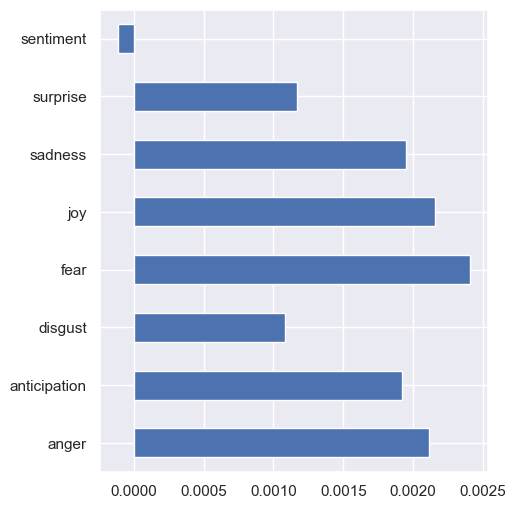

In [67]:
fig, ax = plt.subplots(1)
B[emo_cols].mean().plot.barh(figsize=(5,6), ax=ax);
fig.savefig(cwd+'/output/images/sentiment.png', bbox_inches='tight')

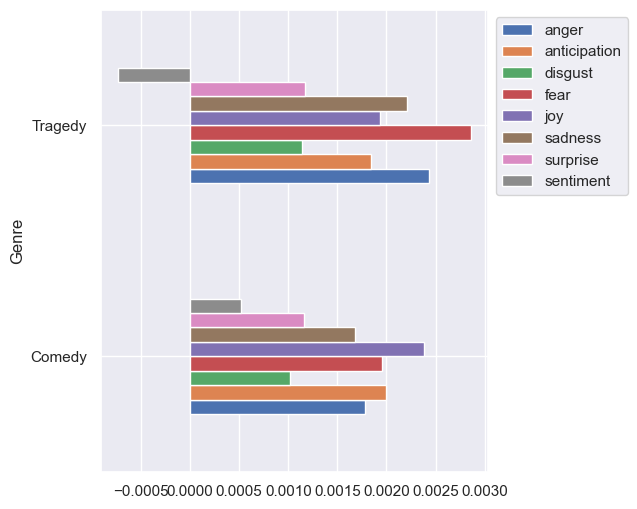

In [27]:
EMO_genre = B.groupby(['Genre'])[emo_cols].mean()

fig, ax = plt.subplots(1)
EMO_genre.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_genre.png', bbox_inches='tight')

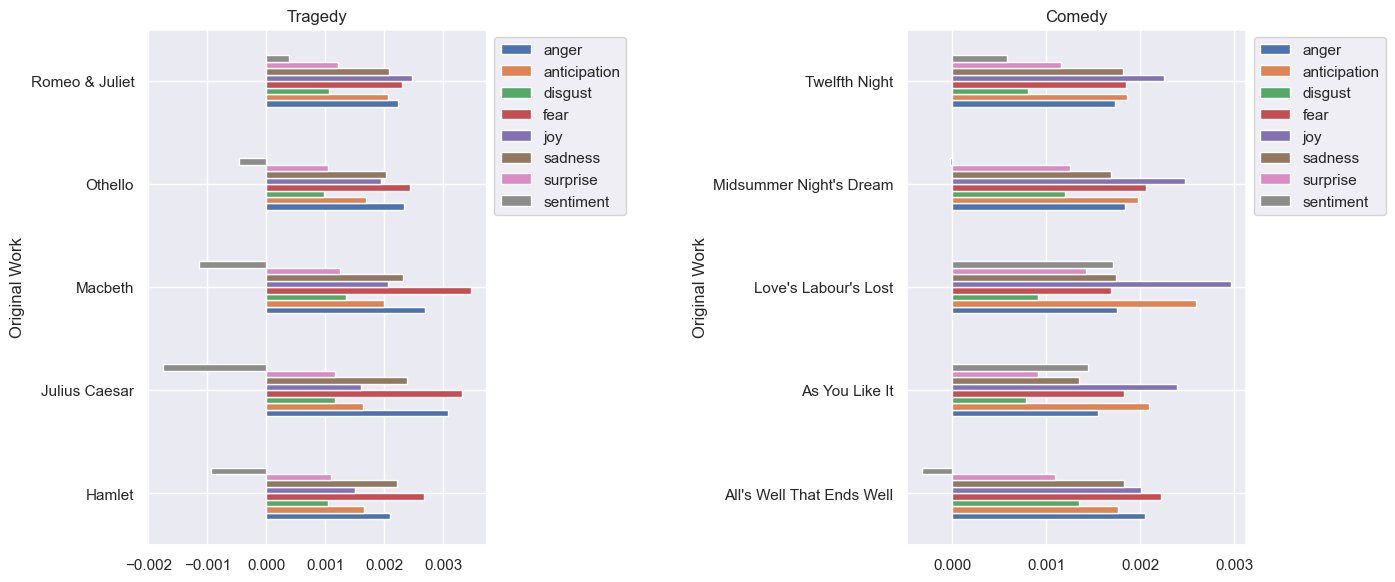

In [28]:
EMO_tragedy_work = B[B.Genre=="Tragedy"].groupby(["Original Work"])[emo_cols].mean()
EMO_comedy_work = B[B.Genre=="Comedy"].groupby(["Original Work"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=6.0)
EMO_tragedy_work.plot.barh(figsize=(18,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_work.plot.barh(figsize=(18,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_title_genre.png')

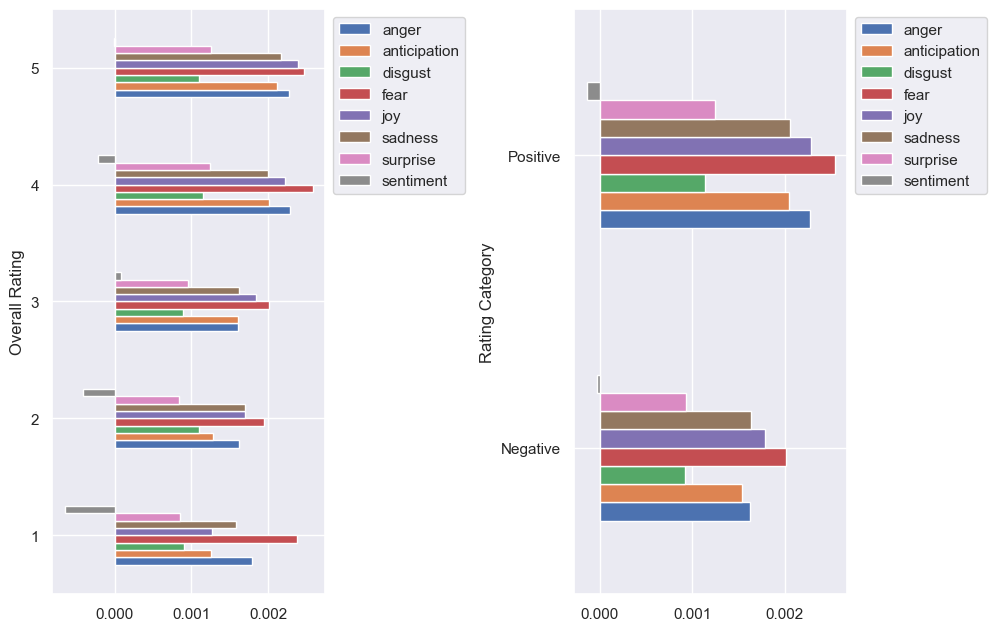

In [29]:
EMO_rating = B.groupby(['Overall Rating'])[emo_cols].mean()
EMO_act_rating = B.groupby(['Rating Category'])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_rating.plot.barh(figsize=(12,10), ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_act_rating.plot.barh(figsize=(12,10), ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating.png')

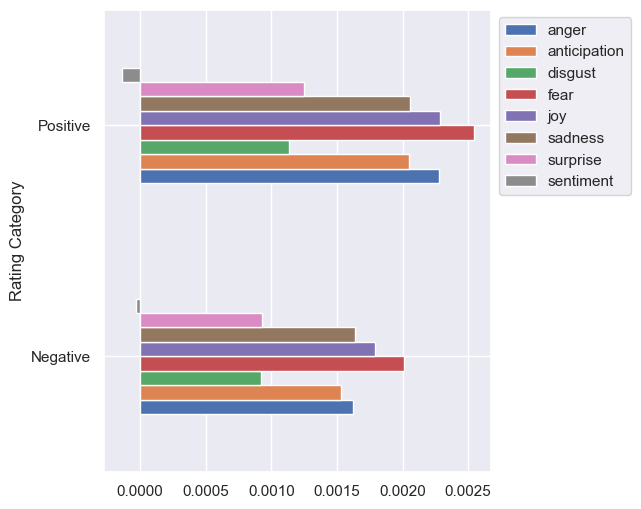

In [68]:
fig, ax = plt.subplots(1)
EMO_act_rating.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_plain.png', bbox_inches='tight')

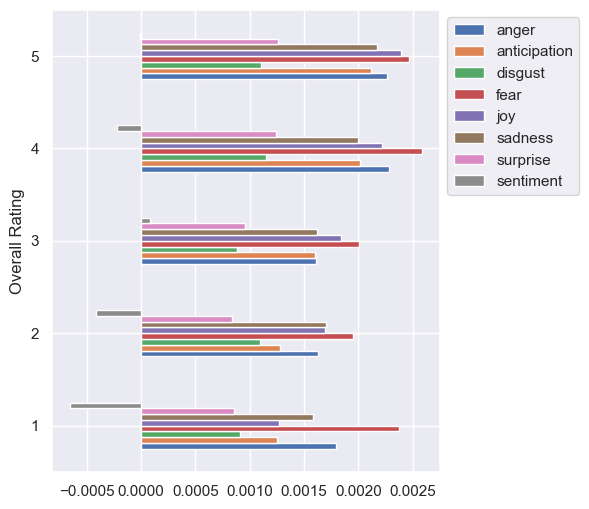

In [69]:
fig, ax = plt.subplots(1)
EMO_rating.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_detail.png', bbox_inches='tight')

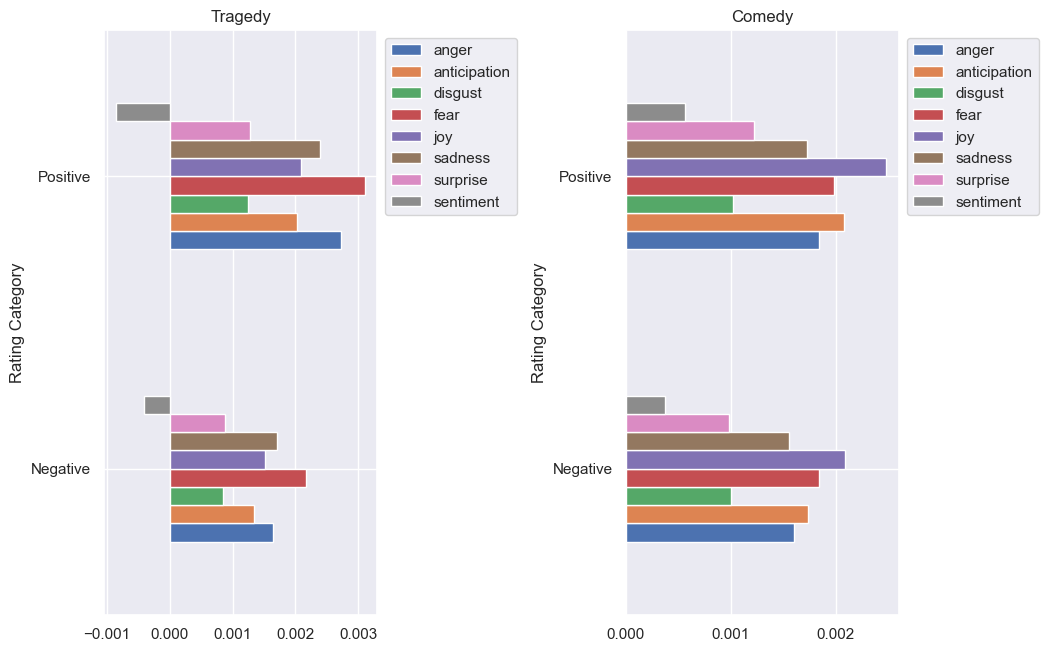

In [30]:
EMO_tragedy_rating = B[B.Genre=="Tragedy"].groupby(["Rating Category"])[emo_cols].mean()
EMO_comedy_rating = B[B.Genre=="Comedy"].groupby(["Rating Category"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_tragedy_rating.plot.barh(figsize=(12,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_rating.plot.barh(figsize=(12,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_genre.png')

In [31]:
B.to_csv(cwd+'/output/sentiment.csv')

## PCA

In [32]:
tfidf, dfidf = eta_tools.TFIDF(eta_tools.BOW(CORPUS))

VOCAB = VOCAB.join(dfidf.to_frame("dfidf"), on="term_str")

VOCAB.to_csv(cwd+'/output/VOCAB.csv')

top_nouns = VOCAB[VOCAB["max_pos"].isin(["NN", "NNS"])].sort_values("dfidf", ascending=False).head(1000).index

reduced_tfidf = tfidf[top_nouns.values]

reduced_tfidf.to_csv(cwd+'/output/reduced_tfidf.csv')

reduced_tfidf

term_str                                            performances     story  \
review_id                                                                    
 A Decisive Hamlet in a Post-colonial World             0.000000  0.114568   
"As You Like It" Amiable at the Folger                  0.000000  0.000000   
"As You Like It" As It Should Be                        0.000000  0.156777   
80s Throwback is a Dream                                0.000000  0.000000   
A Beautiful Bard Ballet                                 0.297877  0.297877   
...                                                          ...       ...   
Witch's View                                            0.135399  0.000000   
Witches Rule in Macbeth's Court                         0.000000  0.000000   
Words, words, words...although not as many as y...      0.106385  0.000000   
Youthful and Musical Twelfth Night at the PST           0.087611  0.000000   
iHamlet at the Philly Fringe                            0.000000  0.000000   

term_str                                            designer     sense  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.000000   
"As You Like It" Amiable at the Folger              0.000000  0.000000   
"As You Like It" As It Should Be                    0.000000  0.158245   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.088431  0.088431   
iHamlet at the Philly Fringe                        0.000000  0.107380   

term_str                                                text     world  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.118921   
"As You Like It" Amiable at the Folger              0.048462  0.055213   
"As You Like It" As It Should Be                    0.000000  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.000000  0.000000   
iHamlet at the Philly Fringe                        0.193848  0.000000   

term_str                                            something     roles  \
review_id                                                                 
 A Decisive Hamlet in a Post-colonial World          0.000000  0.000000   
"As You Like It" Amiable at the Folger               0.111462  0.000000   
"As You Like It" As It Should Be                     0.000000  0.082901   
80s Throwback is a Dream                             0.000000  0.000000   
A Beautiful Bard Ballet                              0.000000  0.000000   
...                                                       ...       ...   
Witch's View                                         0.000000  0.000000   
Witches Rule in Macbeth's Court                      0.082130  0.165802   
Words, words, words...although not as many as y...   0.111462  0.000000   
Youthful and Musical Twelfth Night at the PST        0.000000  0.000000   
iHamlet at the Philly Fringe                         0.000000  0.000000   

term_str                                                 man     place  ...  \
revi

In [33]:
loadings, dcm, compinf = eta_tools.PCA(X=reduced_tfidf, 
                              k=10, 
                              norm_docs=True, 
                              center_by_mean=False,
                              center_by_variance=False)

In [34]:
dcm  = dcm.join(LIB[['Review Title', "Genre", "Original Work", "Review Author", "Rating Category"]]\
                .set_index("Review Title"), on="review_id")

dcm.to_csv(cwd+'/output/pca_dcm.csv')
loadings.to_csv(cwd+'/output/pca_loadings.csv')
compinf.to_csv(cwd+'/output/pca_compinf.csv')

dcm

PC0       PC1  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.280611 -0.133344   
"As You Like It" Amiable at the Folger             -0.363846  0.045003   
"As You Like It" As It Should Be                   -0.377884 -0.023795   
80s Throwback is a Dream                           -0.292354  0.218226   
A Beautiful Bard Ballet                            -0.224400 -0.005030   
...                                                      ...       ...   
Witch's View                                       -0.237508 -0.185530   
Witches Rule in Macbeth's Court                    -0.310705 -0.203972   
Words, words, words...although not as many as y... -0.261170 -0.014524   
Youthful and Musical Twelfth Night at the PST      -0.334601 -0.054521   
iHamlet at the Philly Fringe                       -0.279900 -0.055751   

                                                         PC2       PC3  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.093411  0.032151   
"As You Like It" Amiable at the Folger             -0.180268  0.191220   
"As You Like It" As It Should Be                   -0.060256  0.086937   
80s Throwback is a Dream                            0.030936 -0.022133   
A Beautiful Bard Ballet                             0.031766  0.132085   
...                                                      ...       ...   
Witch's View                                        0.227024 -0.255562   
Witches Rule in Macbeth's Court                     0.235212 -0.271611   
Words, words, words...although not as many as y...  0.007343  0.064544   
Youthful and Musical Twelfth Night at the PST      -0.295480 -0.194089   
iHamlet at the Philly Fringe                        0.006197  0.042986   

                                                         PC4       PC5  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.006042 -0.020256   
"As You Like It" Amiable at the Folger             -0.221899 -0.205654   
"As You Like It" As It Should Be                   -0.044664  0.016126   
80s Throwback is a Dream                            0.028155 -0.050751   
A Beautiful Bard Ballet                             0.108655  0.080092   
...                                                      ...       ...   
Witch's View                                       -0.094748 -0.235009   
Witches Rule in Macbeth's Court                    -0.066766 -0.269427   
Words, words, words...although not as many as y...  0.059892 -0.010434   
Youthful and Musical Twelfth Night at the PST      -0.027267  0.179824   
iHamlet at the Philly Fringe                        0.045275  0.083992   

                                                         PC6       PC7  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.061622 -0.102404   
"As You Like It" Amiable at the Folger             -0.276607 -0.057977   
"As You Like It" As It Should Be                   -0.052082  0.030545   
80s Throwback is a Dream                            0.013131 -0.075771   
A Beautiful Bard Ballet                            -0.030886 -0.006852   
...                                                      ...       ...   
Witch's View                                        0.051722  0.020538   
Witches Rule in Macbeth's Court                     0.056405 -0.085648   
Words, words, words...although not as many as y... -0.000655  0.002926   
Youthful and Musical Twelfth Night at the PST      -0.066752  0.065376   
iHamlet at the Philly Fringe                        0.007513 -0.052709   

                                                         PC8       PC9  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.037

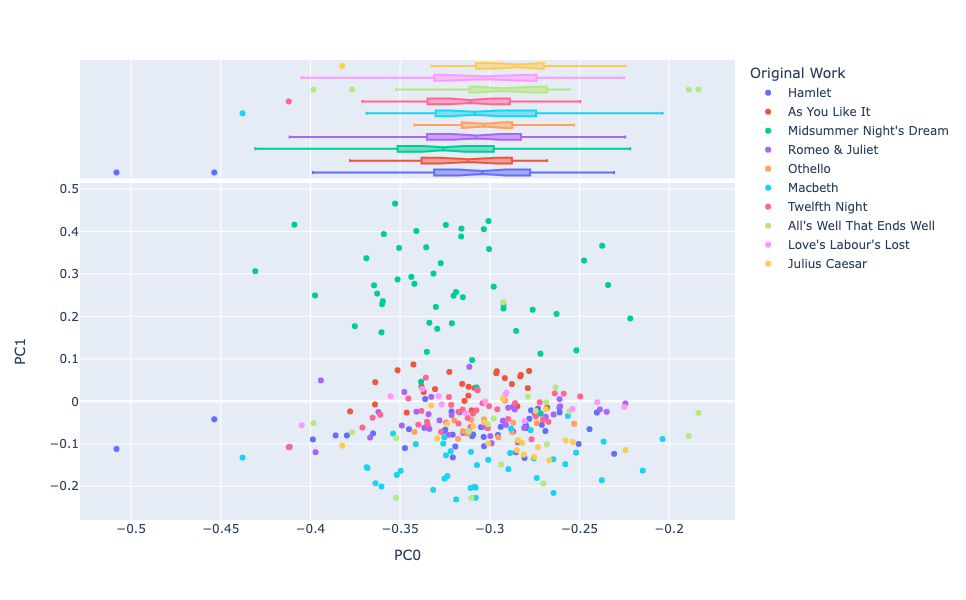

In [35]:
eta_tools.vis_pcs(dcm, 0, 1, label='Original Work', hover_name="Original Work")

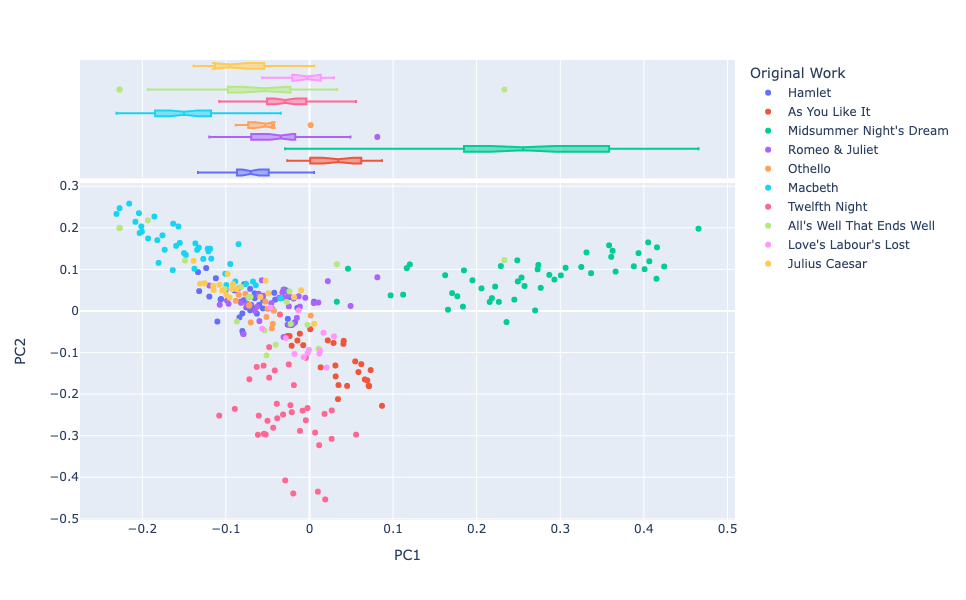

In [43]:
eta_tools.vis_pcs(dcm, 1, 2, label='Original Work', hover_name="Original Work")

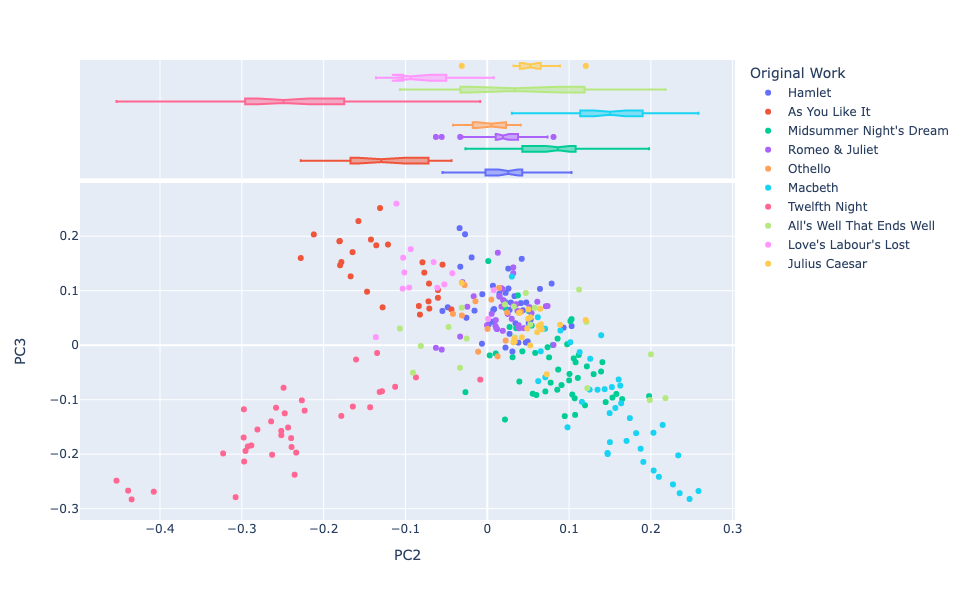

In [44]:
eta_tools.vis_pcs(dcm, 2, 3, label='Original Work', hover_name="Original Work")

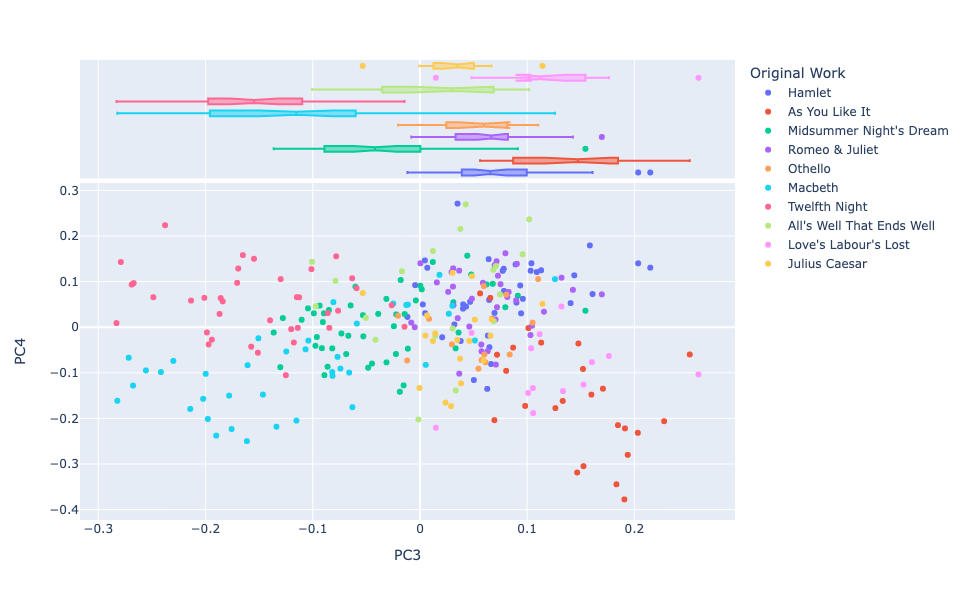

In [45]:
eta_tools.vis_pcs(dcm, 3, 4, label='Original Work', hover_name="Original Work")

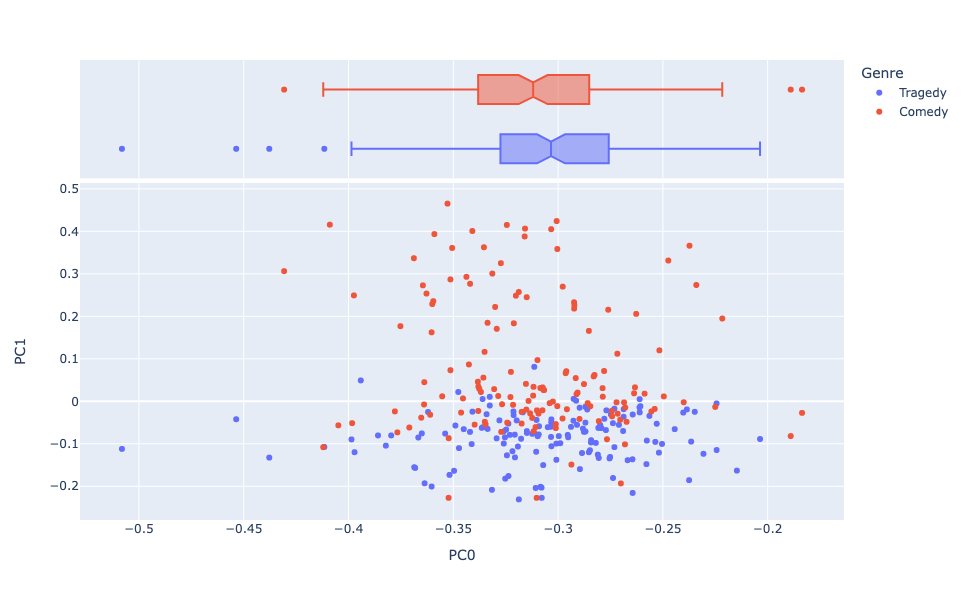

In [36]:
eta_tools.vis_pcs(dcm, 0, 1, label='Genre', hover_name="Original Work")

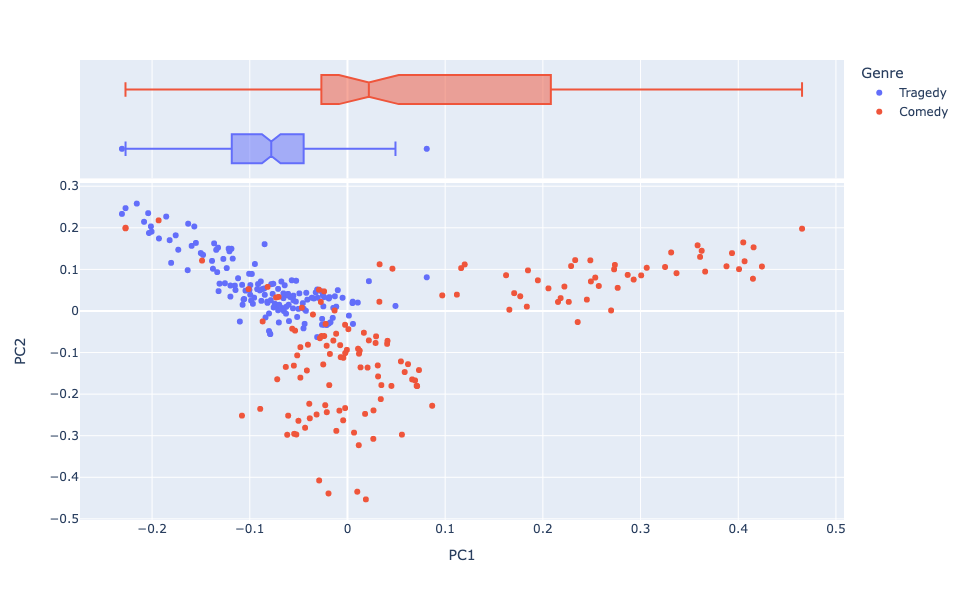

In [46]:
eta_tools.vis_pcs(dcm, 1, 2, label='Genre', hover_name="Original Work")

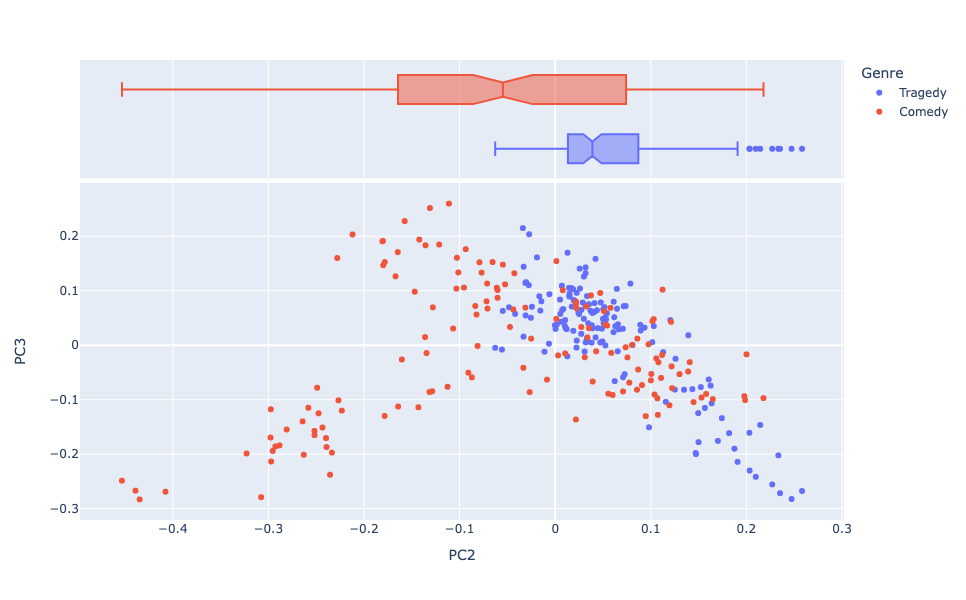

In [47]:
eta_tools.vis_pcs(dcm, 2, 3, label='Genre', hover_name="Original Work")

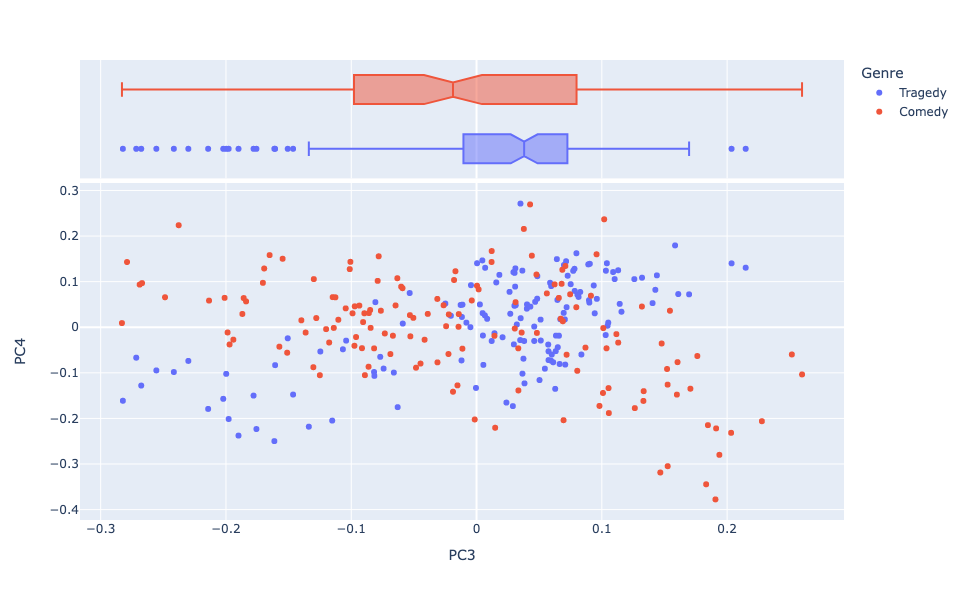

In [48]:
eta_tools.vis_pcs(dcm, 3, 4, label='Genre', hover_name="Original Work")

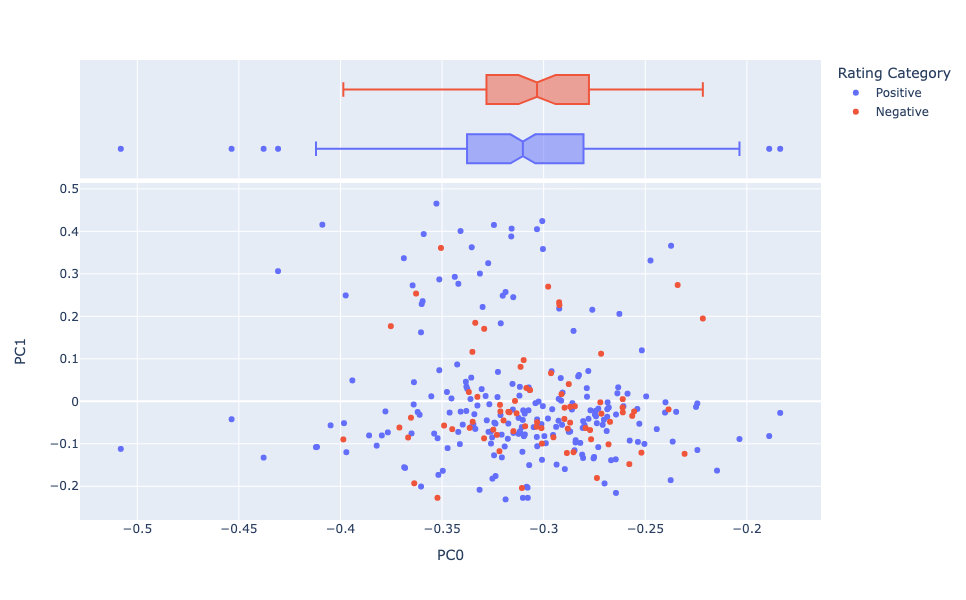

In [37]:
eta_tools.vis_pcs(dcm, 0, 1, label='Rating Category', hover_name="Original Work")

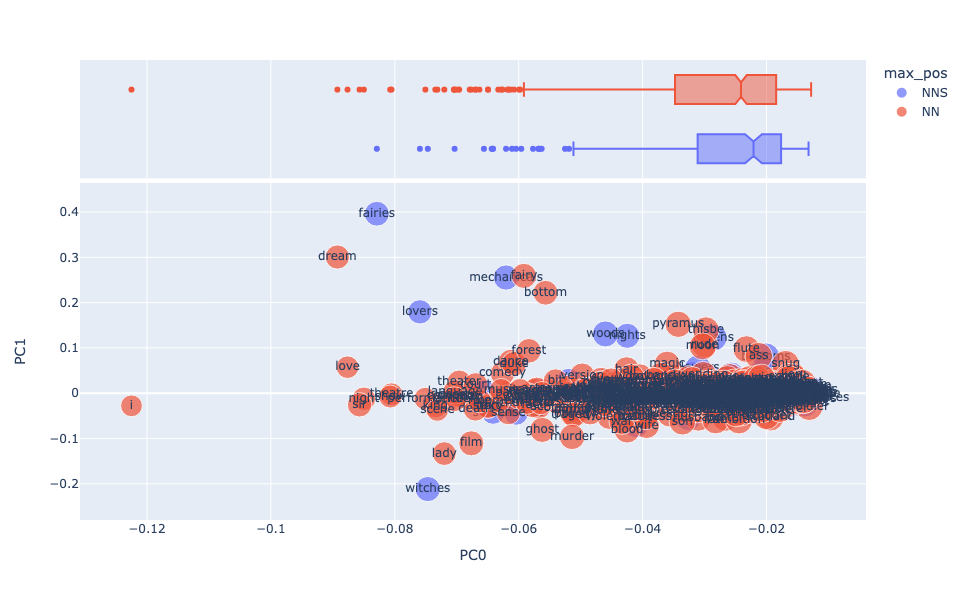

In [42]:
eta_tools.vis_loadings(loadings, VOCAB)

In [49]:
loadings.sort_values('PC0')[['PC0']]

pc_id           PC0
term_str           
i         -0.122502
dream     -0.089265
love      -0.087628
sir       -0.085686
night     -0.084996
...             ...
cape      -0.013319
orders    -0.013215
reaction  -0.013208
soldier   -0.013119
stephanie -0.012800

[1000 rows x 1 columns]

In [50]:
loadings.sort_values('PC1')[['PC1']]

pc_id             PC1
term_str             
witches     -0.211766
lady        -0.133413
film        -0.110775
murder      -0.096594
blood       -0.081616
...               ...
bottom       0.221833
mechanicals  0.255454
fairy        0.259088
dream        0.300742
fairies      0.396286

[1000 rows x 1 columns]

In [54]:
loadings.sort_values('PC2', ascending=False)[['PC2']].tail(10)

pc_id           PC2
term_str           
aguecheek -0.112516
steward   -0.115361
court     -0.117306
fool      -0.124554
gender    -0.127850
illyria   -0.129107
belch     -0.134797
night     -0.143762
duke      -0.158087
sir       -0.444003

## Word Embeddings

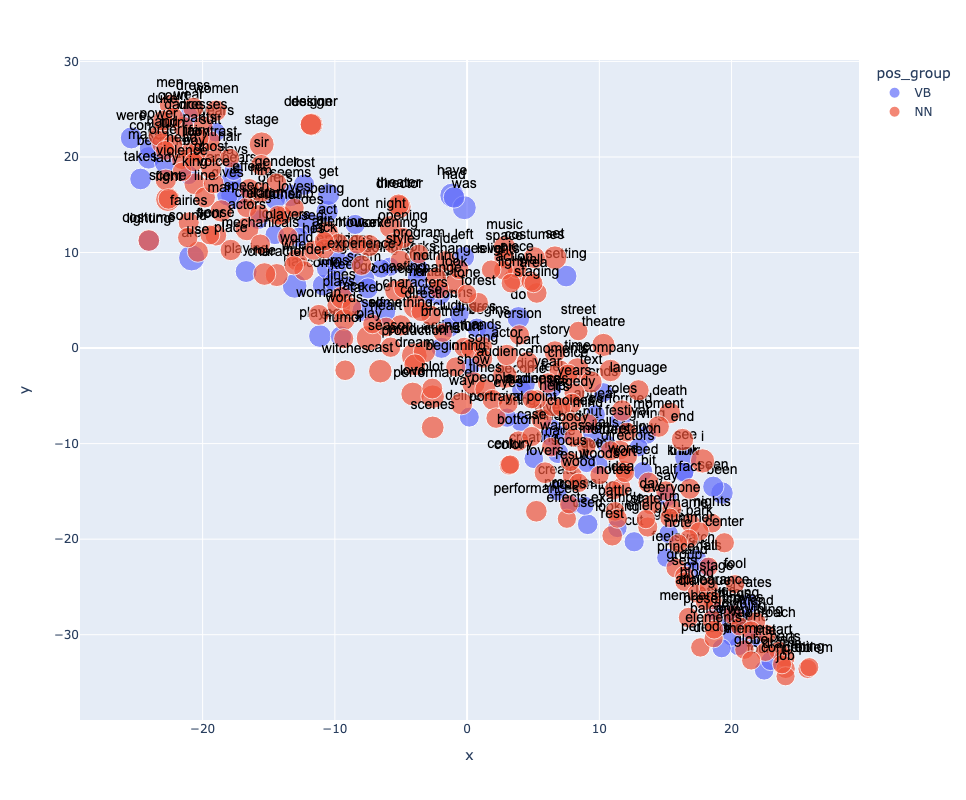

In [38]:
gensim = eta_tools.gensim_corpus(CORPUS, ['review_id'])

gensim.word2vec(min_count=50)

gensim.generate_coords()

gensim.plot().show()

In [39]:
gensim.get_most_similar("design")

term       sim
0  designer  0.999366
1       set  0.998286
2  lighting  0.998218
3  costumes  0.998143
4     sound  0.997964
5     piece  0.997564
6   effects  0.997554
7   costume  0.997522
8     stage  0.997512
9   dresses  0.997471

In [40]:
gensim.get_most_similar("actor")

term       sim
0  character  0.999310
1       role  0.999291
2   anything  0.999283
3      turns  0.999263
4     having  0.999245
5      voice  0.999239
6      title  0.999235
7      hands  0.999230
8      lines  0.999228
9       face  0.999227

In [65]:
gensim.complete_analogy('comedy', 'life', 'tragedy', 10)

term       sim
0     song  0.998817
1     feel  0.998752
2    pants  0.998746
3   begins  0.998737
4    fight  0.998734
5    moves  0.998725
6   trying  0.998720
7  brother  0.998716
8   leaves  0.998715
9     sets  0.998712

In [60]:
gensim.get_most_similar('comedy')

term       sim
0    gender  0.999459
1   casting  0.999396
2    having  0.999362
3    offers  0.999354
4    become  0.999352
5     drama  0.999345
6    ending  0.999340
7  anything  0.999337
8     turns  0.999332
9  festival  0.999331

In [63]:
gensim.get_most_similar('tragedy')

term       sim
0             put  0.999469
1            it's  0.999454
2  interpretation  0.999447
3            feel  0.999445
4          ending  0.999439
5             fun  0.999438
6            part  0.999436
7       directors  0.999435
8           moves  0.999433
9          begins  0.999429